In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense,Flatten
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import cv2
import seaborn as sn

In [2]:
df_train = pd.read_csv('train.csv' , header=None)
char_map = pd.read_csv('mappings.txt' , delimiter=' ', header=None , index_col=0 , squeeze=True)

In [3]:
label_dictionary = {}
for index, label in enumerate(char_map):
    label_dictionary[index] = chr(label)

In [4]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

In [5]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [6]:
X_train = np.asarray(X_train)
X_train = np.apply_along_axis(rotate, 1, X_train)
print ("X_train:",X_train.shape)

X_train: (112800, 28, 28)


In [7]:
X_train=X_train.reshape(-1,28,28,1)

In [8]:
y_train = utils.to_categorical(y_train, 47)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.10, random_state=1)

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(47,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=20,batch_size=19,validation_split=0.2)

Epoch 1/20
4275/4275 [==============================] - 15s 4ms/step - loss: 2.9311 - accuracy: 0.1954 - val_loss: 1.6371 - val_accuracy: 0.5245
Epoch 2/20
4275/4275 [==============================] - 14s 3ms/step - loss: 1.1616 - accuracy: 0.6571 - val_loss: 0.9873 - val_accuracy: 0.7088
Epoch 3/20
4275/4275 [==============================] - 18s 4ms/step - loss: 0.8593 - accuracy: 0.7394 - val_loss: 0.8123 - val_accuracy: 0.7550
Epoch 4/20
4275/4275 [==============================] - 16s 4ms/step - loss: 0.7411 - accuracy: 0.7767 - val_loss: 0.7758 - val_accuracy: 0.7661
Epoch 5/20
4275/4275 [==============================] - 15s 3ms/step - loss: 0.6803 - accuracy: 0.7930 - val_loss: 0.7073 - val_accuracy: 0.7954
Epoch 6/20
4275/4275 [==============================] - 15s 3ms/step - loss: 0.6303 - accuracy: 0.8074 - val_loss: 0.7169 - val_accuracy: 0.7936
Epoch 7/20
4275/4275 [==============================] - 15s 4ms/step - loss: 0.6076 - accuracy: 0.8128 - val_loss: 0.7243 - val_ac

In [13]:
y_prob = model.predict(X_test)

353/353 [==============================] - 1s 2ms/step


In [14]:
y_pred = model.predict(X_test)

353/353 [==============================] - 1s 2ms/step


In [15]:
test_acc = model.evaluate(X_test, y_test)
print('Loss value is ',test_acc[0])
print('Accuracy value is ',test_acc[1])

353/353 [==============================] - 1s 2ms/step - loss: 0.6732 - accuracy: 0.8191
Loss value is  0.6732017993927002
Accuracy value is  0.8191489577293396


In [16]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

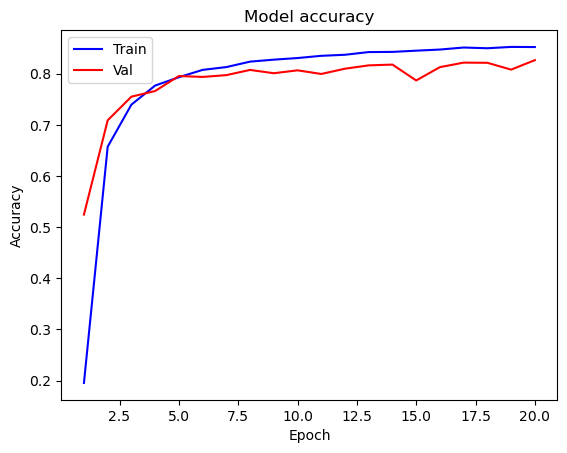

In [17]:
plotgraph(epochs, acc, val_acc)

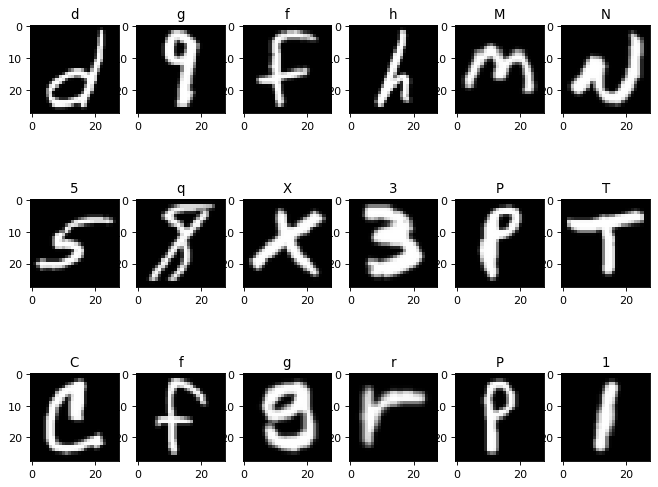

In [18]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(200, 218):
    plt.subplot(3,6,i-199)
    plt.imshow(X_test[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

Predicted M


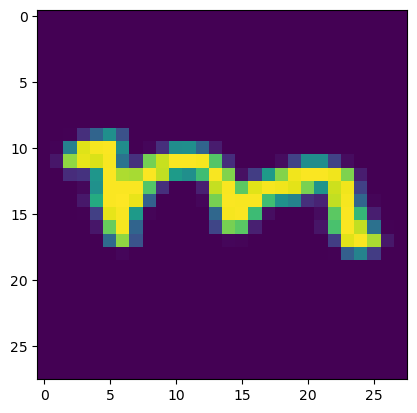

In [19]:
index= 446

print("Predicted " + label_dictionary[(y_pred[index].argmax())])
im = X_test[index]
im = rotate(im)
im = rotate(im)
plt.imshow(im)

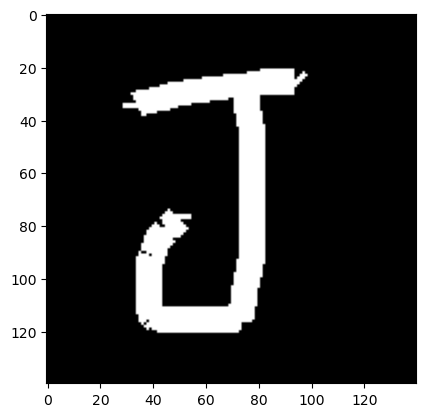

In [20]:
img = cv2.imread('f.png')
plt.imshow(img)

In [21]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [22]:
resized_img = cv2.resize(gray , (28,28) , interpolation = cv2.INTER_AREA)


In [23]:
resized_img = resized_img.reshape(-1,28,28,1)

In [24]:
y_pred_samp = model.predict(resized_img)

1/1 [==============================] - 0s 82ms/step


Predicted J


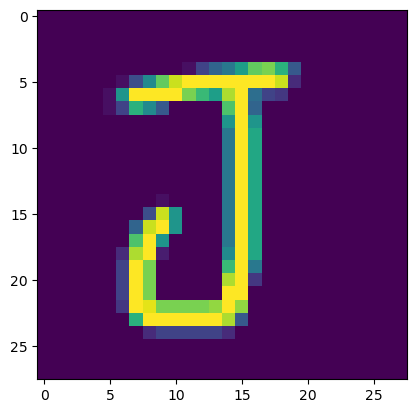

In [25]:
print("Predicted " + label_dictionary[ ( y_pred_samp[0].argmax() ) ]  )
im = resized_img
im = rotate(im)
im = rotate(im)
plt.imshow(im)

In [1]:
# model.save("C:/Users/Omar Atef/Ai project")